# EDA - pd

## Carga del dataset y analisis incial

El objetivo de este ejercicio va a ser intentar averiguar si un pd es legendario o no. Todo el EDA y el posterior clasificacion esta enfocada en ello. A continuacion explicare las columnas y las conclusiones que he llegado tras realizar el EDA.

- **pokedex_number**: Posicion que ocupa en la pokedex (nula importancia)

- **name**: Nombre del pokemon (nula importancia)

- **height_m**: ALtura media del pokemon en metros (importancia media, si que parece que los legendarios son mas altos).

- **percentage_male**: porcentaje de que salga el pokemon con genero masculino (Puede a llegar a ser importante ya que por lo que he podido observar la mayoria de legendarios no tienen genero).

- **attack**: Influye en el daño causado por movimientos físicos los que usan el ataque físico(muy importante)

- **defense**: Reduce el daño recibido de movimientos físicos (muy importante).

- **hp**: Puntos de vida, determina cuánta vida tiene un Pokémon(muy importante).

- **sp_attack**: ataque especial, determina el poder de los movimientos especiales (muy importante).

- **sp_defense**: defensa especial, reduce el daño recibido de movimientos especiales (muy importante).

- **speed**: Velocidad, Define qué Pokémon ataca primero en un combate (muy importante).

Las anteriores 6 columnas son las conocidas como las stats de un pokemon, son muy importantes porque los legendarios posen stats mas fuertes.

- **type**: Tipo del pokemon (importancia nula).

- **weight_kg**: Peso medio del pokemon (importancia media. los legendarios si que tienen mas peso de media).

- **generation**: Generacion a la que pertenece el pokemon (importancia nula).

- **is_legendary**: Si el pd es legendario (variable "y", la que intentaremos averiguar en el proceso de clasificacion).


In [97]:
#importamos pandas
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore") #ignoramos los warnings

import matplotlib.pyplot as plt
import seaborn as sns


#cargamos  dataset
col_names_pokemon = ["pokedex_number","name","attack","defense","height_m","hp","percentage_male","sp_attack","sp_defense","speed","type","weight_kg","generation","is_legendary"]
df =  pd.read_csv("datasets/pokedex.csv", header=0, names=col_names_pokemon)

#mostramos primeros registros
df.head()

,pokedex_number,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
0,1,Bulbasaur,49,49,0.7,45,88.1,65,65,45,grass,6.9,1,0
1,2,Ivysaur,62,63,1.0,60,88.1,80,80,60,grass,13.0,1,0
2,3,Venusaur,100,123,2.0,80,88.1,122,120,80,grass,100.0,1,0
3,4,Charmander,52,43,0.6,39,88.1,60,50,65,fire,8.5,1,0
4,5,Charmeleon,64,58,1.1,58,88.1,80,65,80,fire,19.0,1,0


In [98]:
#Mostramos infrmacion basica del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pokedex_number   801 non-null    int64  
 1   name             801 non-null    object 
 2   attack           801 non-null    int64  
 3   defense          801 non-null    int64  
 4   height_m         781 non-null    float64
 5   hp               801 non-null    int64  
 6   percentage_male  703 non-null    float64
 7   sp_attack        801 non-null    int64  
 8   sp_defense       801 non-null    int64  
 9   speed            801 non-null    int64  
 10  type             801 non-null    object 
 11  weight_kg        781 non-null    float64
 12  generation       801 non-null    int64  
 13  is_legendary     801 non-null    int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 87.7+ KB


In [99]:
df.describe()

,pokedex_number,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,401.000000,77.857678,73.008739,1.163892,68.958801,55.155761,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,231.373075,32.158820,30.769159,1.080326,26.576015,20.261623,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,1.000000,5.000000,5.000000,0.100000,1.000000,0.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,201.000000,55.000000,50.000000,0.600000,50.000000,50.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,401.000000,75.000000,70.000000,1.000000,65.000000,50.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,601.000000,100.000000,90.000000,1.500000,80.000000,50.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,801.000000,185.000000,230.000000,14.500000,255.000000,100.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


## Estrategia a seguir con los valores nulos

Como podemos observar hay algunas columnas con algunos registros con valores nulos:

- height_m
- percentage_male
- weight_kg

A continucacion las enumero:


In [100]:
#Enumerar registros con valores nulos de la columna height_m
print(df[df['height_m'].isnull()])

     pokedex_number       name  attack  defense  height_m   hp  \
18               19    Rattata      56       35       NaN   30   
19               20   Raticate      71       70       NaN   75   
25               26     Raichu      85       50       NaN   60   
26               27  Sandshrew      75       90       NaN   50   
27               28  Sandslash     100      120       NaN   75   
36               37     Vulpix      41       40       NaN   38   
37               38  Ninetales      67       75       NaN   73   
49               50    Diglett      55       30       NaN   10   
50               51    Dugtrio     100       60       NaN   35   
51               52     Meowth      35       35       NaN   40   
52               53    Persian      60       60       NaN   65   
73               74    Geodude      80      100       NaN   40   
74               75   Graveler      95      115       NaN   55   
75               76      Golem     120      130       NaN   80   
87        

In [101]:
#Enumerar registros con valores nulos de la columna percentage_male
print(df[df['percentage_male'].isnull()])

     pokedex_number        name  attack  defense  height_m   hp  \
80               81   Magnemite      35       70       0.3   25   
81               82    Magneton      60       95       1.0   50   
99              100     Voltorb      30       50       0.5   40   
100             101   Electrode      50       70       1.2   60   
119             120      Staryu      45       55       0.8   30   
..              ...         ...     ...      ...       ...  ...   
796             797  Celesteela     101      103       9.2   97   
797             798     Kartana     181      131       0.3   59   
798             799    Guzzlord     101       53       5.5  223   
799             800    Necrozma     107      101       2.4   97   
800             801    Magearna      95      115       1.0   80   

     percentage_male  sp_attack  sp_defense  speed      type  weight_kg  \
80               NaN         95          55     45  electric        6.0   
81               NaN        120          70  

In [102]:
#Enumerar registros con valores nulos de la columna weight_kg
print(df[df['weight_kg'].isnull()])

     pokedex_number       name  attack  defense  height_m   hp  \
18               19    Rattata      56       35       NaN   30   
19               20   Raticate      71       70       NaN   75   
25               26     Raichu      85       50       NaN   60   
26               27  Sandshrew      75       90       NaN   50   
27               28  Sandslash     100      120       NaN   75   
36               37     Vulpix      41       40       NaN   38   
37               38  Ninetales      67       75       NaN   73   
49               50    Diglett      55       30       NaN   10   
50               51    Dugtrio     100       60       NaN   35   
51               52     Meowth      35       35       NaN   40   
52               53    Persian      60       60       NaN   65   
73               74    Geodude      80      100       NaN   40   
74               75   Graveler      95      115       NaN   55   
75               76      Golem     120      130       NaN   80   
87        

In [103]:
#Por curiosidad revise si los pokemon que tienen valores nulos en las columnas peso 
# y altura son los mismos ya que vi a simple vista alguna concidencia
df[df['weight_kg'].isnull()].equals(df[df['height_m'].isnull()])
#Resulta que si que son los mismos

True

Con "height_m" y "weight_kg" como son valores cuya importancia es nula o nula asi que he decidido rellenarlos con la media del resto de registros.

En cambio con "porcentage_male", tras investigar he llegado a la resolucion de que todos los pokemon cuyo valor es nulo en porcentage_male" no tienen genero, por lo que aquellos registros que sean nulos pondre -1 ya que esta columna  es importante y quiero saber que pokemon no tienen genero.

In [104]:
## Rellenar height_m y weight_kg con la media de los Pokémon que sí tienen datos
df['height_m'].fillna(df['height_m'].mean(), inplace=True)
df['weight_kg'].fillna(df['weight_kg'].mean(), inplace=True)

# Rellenar percentage_male con -1
df['percentage_male'].fillna(-1, inplace=True)

## Suma de Caracteristicas

He decidido crear una columna nueva llamada "stats" con la suma de las caracteristicas base (Ataque, Defensa, Ataque especial, defensa especial, velocidad, y Puntos de Salud), ya que despues de investigar todas las caracteristicas son igual de importantes si estamos generalizando (lo que quiero decir que dependiendo por ejemplo los movimientos que aprenda un pokemon una caracteristica es mas importante que otra, pero como no conocemos)

In [105]:
# Sumar todas las estadísticas relevantes
stats_columns = ['attack', 'defense', 'hp', 'sp_attack', 'sp_defense', 'speed']
df['total_stats'] = df[stats_columns].sum(axis=1)

# Mostrar primeras filas para verificar
df.head()

df.to_csv("datasets/pokemon.csv")

Antes de continuar vamos a cambiar la columna "is_legendary" a un valor numerico porque ahora mismo se interpreta como un string.

In [106]:
df['is_legendary'] = df['is_legendary'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pokedex_number   801 non-null    int64  
 1   name             801 non-null    object 
 2   attack           801 non-null    int64  
 3   defense          801 non-null    int64  
 4   height_m         801 non-null    float64
 5   hp               801 non-null    int64  
 6   percentage_male  801 non-null    float64
 7   sp_attack        801 non-null    int64  
 8   sp_defense       801 non-null    int64  
 9   speed            801 non-null    int64  
 10  type             801 non-null    object 
 11  weight_kg        801 non-null    float64
 12  generation       801 non-null    int64  
 13  is_legendary     801 non-null    int64  
 14  total_stats      801 non-null    int64  
dtypes: float64(3), int64(10), object(2)
memory usage: 94.0+ KB


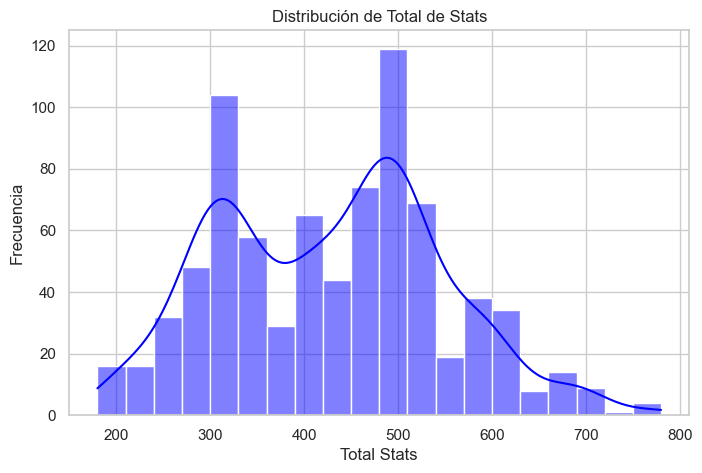

In [107]:
# Configurar estilo
sns.set_theme(style="whitegrid")

# Histograma de Total de Stats
plt.figure(figsize=(8,5))
sns.histplot(df['total_stats'], bins=20, kde=True, color='blue')
plt.title('Distribución de Total de Stats')
plt.xlabel('Total Stats')
plt.ylabel('Frecuencia')
plt.show()

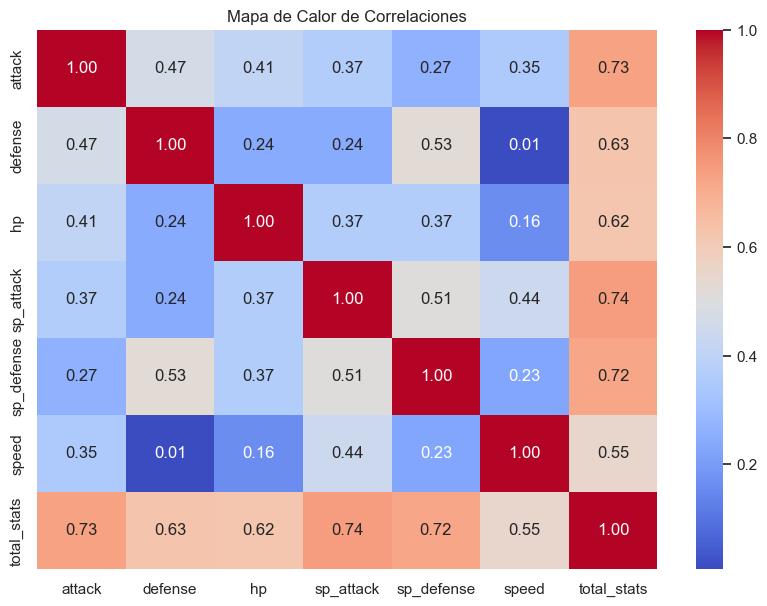

In [108]:
# Heatmap de correlación entre estadísticas
plt.figure(figsize=(10,7))
sns.heatmap(df[stats_columns + ['total_stats']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()

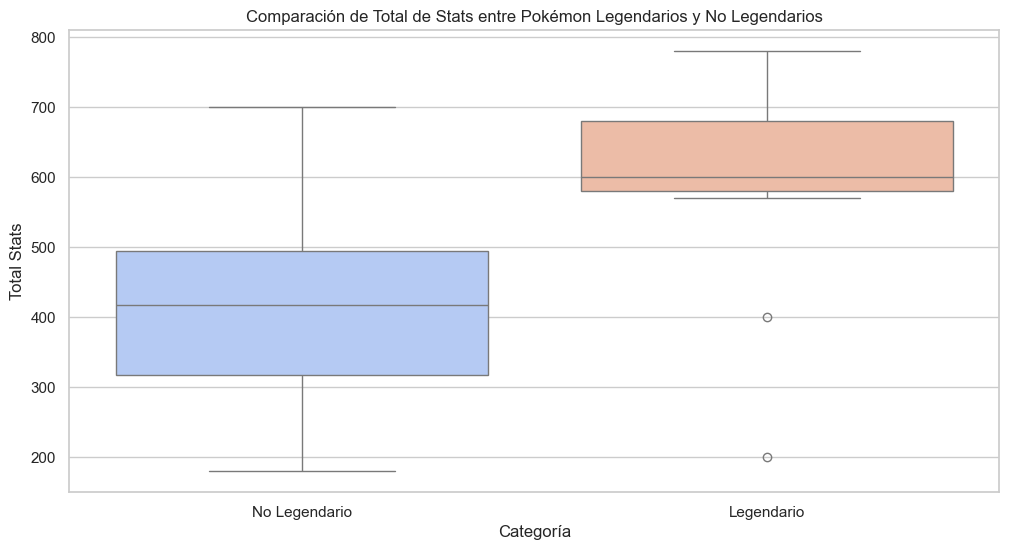

In [109]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['is_legendary'], y=df['total_stats'], palette="coolwarm")
plt.xticks([0, 1], ["No Legendario", "Legendario"])
plt.title("Comparación de Total de Stats entre Pokémon Legendarios y No Legendarios")
plt.xlabel("Categoría")
plt.ylabel("Total Stats")
plt.show()


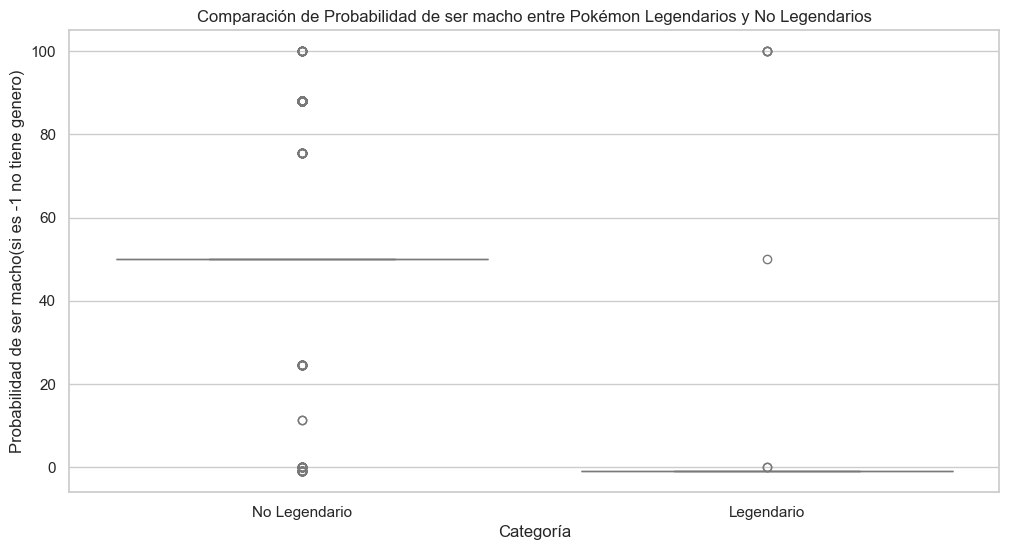

In [110]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['is_legendary'], y=df['percentage_male'], palette="coolwarm")
plt.xticks([0, 1], ["No Legendario", "Legendario"])
plt.title("Comparación de Probabilidad de ser macho entre Pokémon Legendarios y No Legendarios")
plt.xlabel("Categoría")
plt.ylabel("Probabilidad de ser macho(si es -1 no tiene genero)")
plt.show()

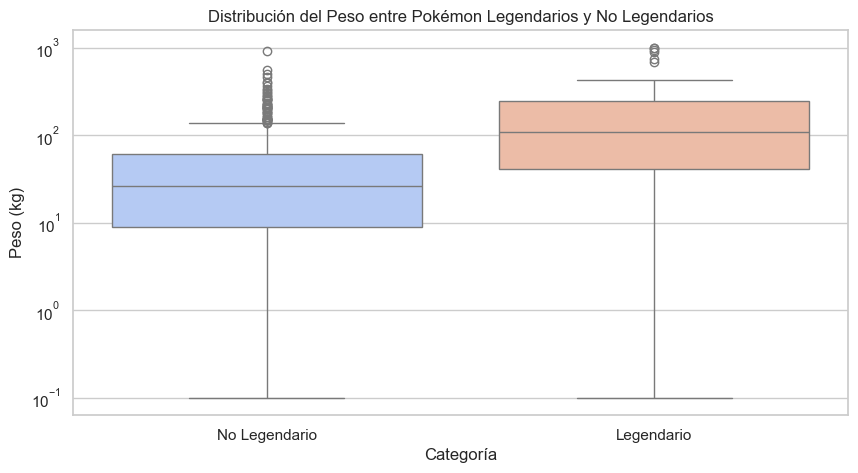

In [111]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['is_legendary'], y=df['weight_kg'], palette="coolwarm")
plt.xticks([0, 1], ["No Legendario", "Legendario"])
plt.title("Distribución del Peso entre Pokémon Legendarios y No Legendarios")
plt.xlabel("Categoría")
plt.ylabel("Peso (kg)")
plt.yscale("log")  # Escala logarítmica para mejor visualización
plt.show()


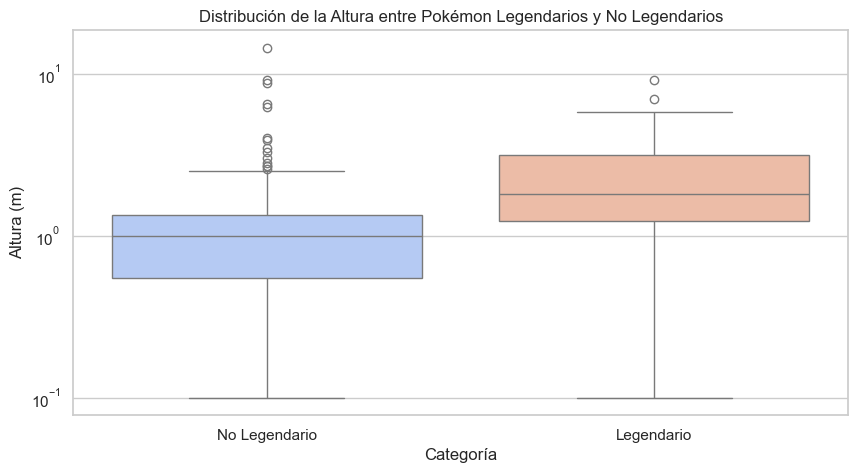

In [112]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['is_legendary'], y=df['height_m'],palette="coolwarm")
plt.xticks([0, 1], ["No Legendario", "Legendario"])
plt.title("Distribución de la Altura entre Pokémon Legendarios y No Legendarios")
plt.xlabel("Categoría")
plt.ylabel("Altura (m)")
plt.yscale("log")  # Escala logarítmica para evitar outliers muy grandes
plt.show()


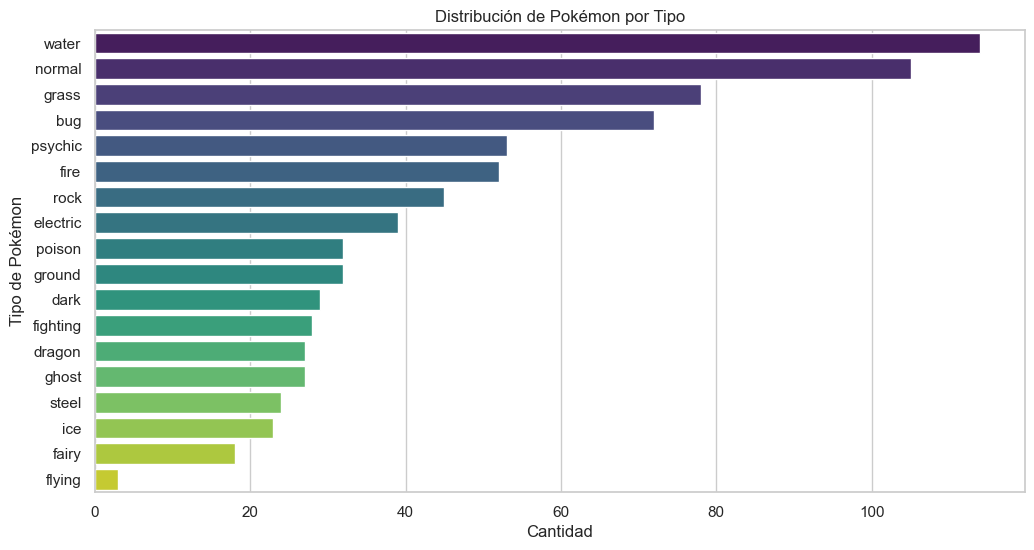

In [113]:
# Conteo de Pokémon por tipo
plt.figure(figsize=(12,6))
sns.countplot(y=df['type'], order=df['type'].value_counts().index, palette="viridis")
plt.title("Distribución de Pokémon por Tipo")
plt.xlabel("Cantidad")
plt.ylabel("Tipo de Pokémon")
plt.show()